In [6]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D,Conv1DTranspose
from keras.layers.convolutional import MaxPooling1D
from keras.layers import LSTM, Bidirectional,ConvLSTM1D
from keras.layers import TimeDistributed,GaussianNoise,Normalization
from keras.layers import RepeatVector
from keras.layers import Input
# from attention import Attention 

from keras.layers import BatchNormalization
from keras.preprocessing.image import img_to_array, array_to_img
from keras.preprocessing.image import load_img
import numpy as np
from numpy import genfromtxt
from keras.constraints import max_norm
import cv2
from sklearn.model_selection import train_test_split
from scipy.integrate import odeint
from sklearn import preprocessing
from sklearn.decomposition import PCA
from scipy.interpolate import CubicSpline
from tensorflow import keras
from tensorflow.keras import layers


from sklearn import preprocessing
from sklearn.decomposition import PCA
from scipy.interpolate import CubicSpline
from sklearn.preprocessing import MinMaxScaler

    
unfeatured_data=[]
featured_data=[]

Normy=1

data_size=173
starter=0


for i in range(starter,data_size): 
  daty = genfromtxt("D:\Research_work\COVID_paper\My_covid_research\dataset_preprocessing\parameter_estim\input\states_ "+str(i+1)+" .csv", delimiter=',')
  unfeatured_data.append(daty[:,1:6])
  days=daty[:,0]
  daty=daty[:,1:6]
  # scaler = MinMaxScaler()
  # daty = scaler.fit_transform(daty)
  S=daty[:,1-1]
  I=daty[:,2-1]
  Q=daty[:,3-1]
  R=daty[:,4-1]
  D=daty[:,5-1]



  sampling_fact=30;  # defining factor
  days_n=np.linspace(0,days[len(days)-1],len(days)*sampling_fact)

  c_S = CubicSpline(days,S)
  cubic_S=c_S(days_n)

  c_I = CubicSpline(days,I)
  cubic_I=c_I(days_n)

  c_Q = CubicSpline(days,Q)
  cubic_Q=c_Q(days_n)

  c_R = CubicSpline(days,R)
  cubic_R=c_R(days_n)

  c_D = CubicSpline(days,D)
  cubic_D=c_D(days_n)


  cubic_S=cubic_S[0:81]
  cubic_I=cubic_I[0:81]
  cubic_Q=cubic_Q[0:81]
  cubic_R=cubic_R[0:81]
  cubic_D=cubic_D[0:81]

  


  nc=1
  S = np.reshape(cubic_S, (-1, 9))
  pca = PCA(n_components=nc)
  S_new= pca.fit_transform(S).flatten()
  S_new=np.expand_dims(S_new, axis=0)

  I = np.reshape(cubic_I, (-1, 9))
  pca = PCA(n_components=nc)
  I_new= pca.fit_transform(I).flatten()
  I_new=np.expand_dims(I_new, axis=0)
  
  Q= np.reshape(cubic_Q, (-1, 9))
  pca = PCA(n_components=nc)
  Q_new= pca.fit_transform(Q).flatten()
  Q_new=np.expand_dims(Q_new, axis=0)

  R= np.reshape(cubic_R, (-1, 9))
  pca = PCA(n_components=nc)
  R_new= pca.fit_transform(R).flatten() 
  R_new=np.expand_dims(R_new, axis=0)

  D= np.reshape(cubic_D, (-1, 9))
  pca = PCA(n_components=nc)
  D_new= pca.fit_transform(D).flatten() 
  D_new=np.expand_dims(D_new, axis=0)

  #Also consider using the Hankel matrix
  #Also consider enlongate the vector two to three pc's


  
  # daty_pca= pca.fit_transform(daty[:,1:6]) 
  # pca = PCA(n_components=2)
  # daty_pca= pca.fit_transform(daty[:,1:6]) 
#----------------------------------------------------------------------------------------------------------------------
  # my_dat=np.concatenate((S_new,I_new,Q_new,R_new,D_new),axis=0)
  # my_dat=np.transpose(my_dat)
#----------------------------------------------------------------------------------------------------------------------

  my_dat=np.concatenate((np.transpose(S_new),np.transpose(I_new),np.transpose(Q_new),np.transpose(R_new),np.transpose(D_new)),axis=1)
#----------------------------------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------------------------------
  #Dimensions should be time x channels
  featured_data.append(my_dat)

featured_data=np.asarray(featured_data)
featured_data=np.reshape(featured_data,(9*(data_size-starter),5))
unfeatured_data=np.asarray(unfeatured_data)
unfeatured_data=np.reshape(unfeatured_data,(3*(data_size-starter),5))

print("Shape of featured Data: ",featured_data.shape)
print("Shape of unfeatured Data: ",unfeatured_data.shape)

Shape of featured Data:  (1557, 5)
Shape of unfeatured Data:  (519, 5)


Unfeatured Data

<AxesSubplot:>

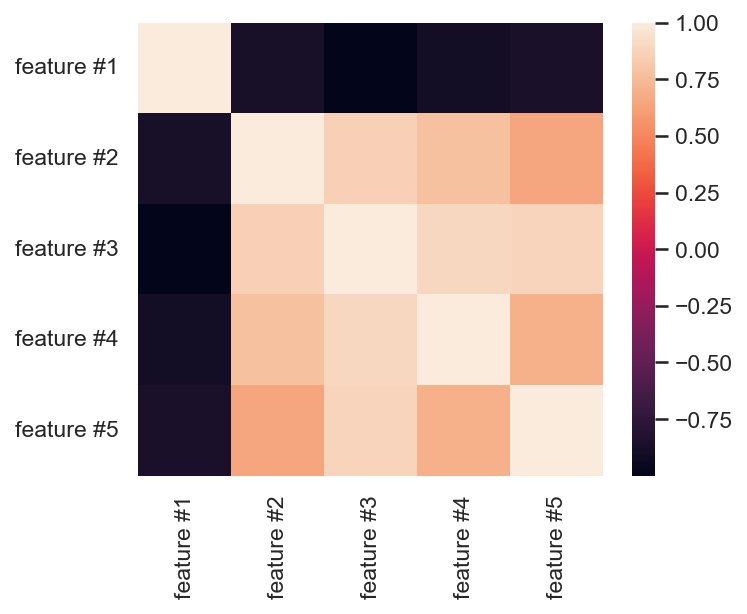

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import figure
plt.figure(figsize=(5,4),dpi=150)


sns.set_theme(style="white")
columns=['feature #1','feature #2','feature #3','feature #4','feature #5']

d = pd.DataFrame(data=unfeatured_data,
                 columns=columns)


# Compute the correlation matrix
corr = d.corr()
sns.heatmap(corr)

Featured Data

<AxesSubplot:>

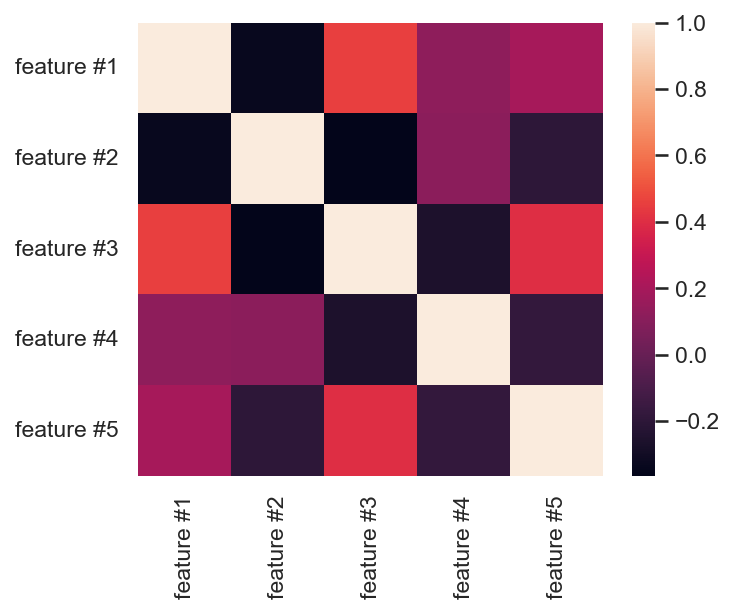

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import figure
plt.figure(figsize=(5,4),dpi=150)


sns.set_theme(style="white")
# columns=['S','I','Q','R','D']

d = pd.DataFrame(data=featured_data,
                 columns=columns)


# Compute the correlation matrix
corr = d.corr()
sns.heatmap(corr)